In [ ]:
import os
import yaml
import pandas as pd
import sqlalchemy

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from IPython.display import display 
pd.options.display.max_columns = None
%matplotlib inline

import time
from jinja2 import Template

In [2]:
import json
from triage import create_engine

with open('config/san_jose_db.json') as f:
    DB_CONFIG = json.load(f)

conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

In [3]:
import RecallAdjuster as ra

In [4]:
sel = """
SELECT DISTINCT model_group_id
FROM triage_metadata.model_groups
WHERE 
    model_group_id IN (61, 95, 106, 112, 115, 118)
    OR (
        model_type ILIKE '%%DecisionTree%%'
        AND (
            (hyperparameters->'max_depth')::INT < 20
            OR
            (hyperparameters->'min_samples_split')::INT < 50
        )
    )
;
"""

exclude_mgs = list(pd.read_sql(sel, conn)['model_group_id'].values)

In [5]:
import datetime
from dateutil.relativedelta import relativedelta
base = datetime.datetime.strptime('2016-06-01', '%Y-%m-%d')
date_pairs = []
for x in range(17,-1,-1):
    date_pairs.append(
        (
        (base - relativedelta(months=3*x) - relativedelta(years=1)).strftime('%Y-%m-%d'),
        (base - relativedelta(months=3*x) - relativedelta(years=1)).strftime('%Y-%m-%d')
        )
    )
    date_pairs.append(
        (
        (base - relativedelta(months=3*x) - relativedelta(years=1)).strftime('%Y-%m-%d'),
        (base - relativedelta(months=3*x)).strftime('%Y-%m-%d')
        )
    )
print(date_pairs)

[('2011-03-01', '2011-03-01'), ('2011-03-01', '2012-03-01'), ('2011-06-01', '2011-06-01'), ('2011-06-01', '2012-06-01'), ('2011-09-01', '2011-09-01'), ('2011-09-01', '2012-09-01'), ('2011-12-01', '2011-12-01'), ('2011-12-01', '2012-12-01'), ('2012-03-01', '2012-03-01'), ('2012-03-01', '2013-03-01'), ('2012-06-01', '2012-06-01'), ('2012-06-01', '2013-06-01'), ('2012-09-01', '2012-09-01'), ('2012-09-01', '2013-09-01'), ('2012-12-01', '2012-12-01'), ('2012-12-01', '2013-12-01'), ('2013-03-01', '2013-03-01'), ('2013-03-01', '2014-03-01'), ('2013-06-01', '2013-06-01'), ('2013-06-01', '2014-06-01'), ('2013-09-01', '2013-09-01'), ('2013-09-01', '2014-09-01'), ('2013-12-01', '2013-12-01'), ('2013-12-01', '2014-12-01'), ('2014-03-01', '2014-03-01'), ('2014-03-01', '2015-03-01'), ('2014-06-01', '2014-06-01'), ('2014-06-01', '2015-06-01'), ('2014-09-01', '2014-09-01'), ('2014-09-01', '2015-09-01'), ('2014-12-01', '2014-12-01'), ('2014-12-01', '2015-12-01'), ('2015-03-01', '2015-03-01'), ('2015-03

In [6]:
## ORIGINAL

conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_orig',
        #experiment_hashes=['357e3a5bc7d3d7cfc2c13db8ea428413', 'a9bf255077d0f97c160e06761c01c637'],
        experiment_hashes=['9dcafc4760c3618bfae96a54a4359481'],
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)

In [7]:
## Under_1_Orig_Orig

conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

start_time = time.time()
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_under_1_orig_orig',
        experiment_hashes=['9f92636ac9a7a4f304e5d0136685bb53'],
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)
print("Time Taken:"+str(time.time()-start_time))

Time Taken:3126.931811571121


In [8]:
## Under_Original_50_50
conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

start_time = time.time()
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_under_original_50_50',
        experiment_hashes=['29c096cd906beed7472fe1b6911cc724'],
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)
print("Time Taken:"+str(time.time()-start_time))

Time Taken:2543.133949279785


In [9]:
# Under_Original_50_Original
conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

start_time = time.time()
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_under_original_50_original',
        experiment_hashes=['4f795e0f95cc22802a53cb08b63583b9'],
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)
print("Time Taken:"+str(time.time()-start_time))

Time Taken:2546.13369345665


In [10]:
# Under_Original_SNOP_Original
conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

start_time = time.time()
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_under_original_snop_original',
        experiment_hashes=['cb18c1495c73b86eb21525d77733ba54'],
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)
print("Time Taken:"+str(time.time()-start_time))

Time Taken:2551.773170232773


In [11]:
# Under_1_50_50
conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

start_time = time.time()
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_under_1_50_50',
        experiment_hashes=['6ee9df9a2bb685f9b8b03a5b3f9dff9b'],
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)
print("Time Taken:"+str(time.time()-start_time))

Time Taken:2582.1982209682465


In [12]:
# Under_1_SNOP_Original
conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

start_time = time.time()
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_under_1_snop_original',
        experiment_hashes=['87587166acf529fb6414fbb68babe013'],
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)
print("Time Taken:"+str(time.time()-start_time))

Time Taken:2534.205322265625


In [13]:
# Over_1_Original_Original
conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

start_time = time.time()
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_over_1_original_original',
        experiment_hashes=['0770d25f5f6736bc6f354a51bfcd088f'],
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)
print("Time Taken:"+str(time.time()-start_time))

Time Taken:2553.9519739151


In [14]:
# Over_original_50_50
conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

start_time = time.time()
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_over_original_50_50',
        experiment_hashes=['754dce4f1806599c151b2073de3c1b5e'],
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)
print("Time Taken:"+str(time.time()-start_time))

Time Taken:2549.3108303546906


In [15]:
# over_original_50_original
conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

start_time = time.time()
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_over_original_50_original',
        experiment_hashes=['5d196b7f90df16afa9865a620a47342b'],
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)
print("Time Taken:"+str(time.time()-start_time))

Time Taken:2545.6663043498993


In [16]:
# over_original_snop_original
conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

start_time = time.time()
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_over_original_snop_original',
        experiment_hashes=['cd5cafc29937dc476ac9b71cd0e3b514'],
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)
print("Time Taken:"+str(time.time()-start_time))

Time Taken:2536.3418078422546


In [17]:
# over_1_50_50
conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

start_time = time.time()
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_over_1_50_50',
        experiment_hashes=['d2d3c40036a5122189f1adee86298a7d'],
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)
print("Time Taken:"+str(time.time()-start_time))

Time Taken:2514.1098687648773


In [18]:
# over_1_snop_original
conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

start_time = time.time()
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_over_1_snop_original',
        experiment_hashes=['9fd8e8e7591eabb51e17591c82308823'],
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)
print("Time Taken:"+str(time.time()-start_time))

Time Taken:2522.063669681549


In [19]:
# nop
conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

start_time = time.time()
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_nop',
        experiment_hashes=['7c51c5a62412e88999abefb96c9f55ef'],
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)
print("Time Taken:"+str(time.time()-start_time))

Time Taken:2500.8822078704834


In [20]:
# decoupled

conn.dispose()
conn = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['pass']}@{DB_CONFIG['host']}/{DB_CONFIG['db']}"
)

start_time = time.time()
myRA = ra.RecallAdjuster(
        engine=conn,
        pg_role='postgres',
        schema='hemank_bias_decoupled',
        experiment_hashes = '',
        decoupled_experiments=[('c44b928c3ff18ab72c262c020ddc876e','over55k'),
                           ('217ec46d626706211b3682d511e42143','under55k')],
    
        date_pairs=date_pairs,
        list_sizes=[500, 750, 1000],
        #entity_demos='joco',
        entity_demos='kit_bias_adj.entity_demos',
        demo_col='median_income',
        exclude_model_groups=exclude_mgs
)
print("Time Taken:"+str(time.time()-start_time))

Time Taken:3647.796539068222


In [21]:
query = Template("""
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM {{schema}}.model_adjustment_results_median_income
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)

-- Simple model selection on last time period, baseline with no recall adjustments
SELECT 'Best Unadjusted Metric - Unadjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.base_value AS value,
       r.base_max_recall_ratio AS max_recall_ratio,
       r.base_recall_under55k_to_over55k AS recall_under_to_over,
       r.base_recall_over55k_to_under55k AS recall_over_to_under
FROM {{schema}}.model_adjustment_results_median_income r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time
AND r.list_size = 500

UNION ALL

-- Model selection on last time before adjustment, with adjustment applied
SELECT 'Best Unadjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_under55k_to_over55k AS recall_under_to_over,
       r.adj_recall_over55k_to_under55k AS recall_over_to_under
FROM {{schema}}.model_adjustment_results_median_income r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time
AND r.list_size = 500

UNION ALL

-- Model selection on last time after adjustment, with adjustment applied
SELECT 'Best Adjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_under55k_to_over55k AS recall_under_to_over,
       r.adj_recall_over55k_to_under55k AS recall_over_to_under
FROM {{schema}}.model_adjustment_results_median_income r
JOIN adj_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time
AND r.list_size = 500

UNION ALL

-- Composite model
SELECT 'Composite Model - Adjusted'::VARCHAR(128) AS strategy,
      r.train_end_time AS train_end_time,
      r.past_train_end_time AS past_train_end_time,
      r.list_size, metric, parameter,
      r.value AS value,
      r.max_recall_ratio AS max_recall_ratio,
      r.recall_under55k_to_over55k AS recall_under_to_over,
      r.recall_over55k_to_under55k AS recall_over_to_under
FROM {{schema}}.composite_results_median_income r
WHERE train_end_time > past_train_end_time
AND r.list_size=500
""")

In [22]:
params = {}
params['schema'] = 'hemank_bias_orig'
sql_orig = query.render(**params)
ts_df_orig = pd.read_sql(sql_orig, conn)

params = {}
params['schema'] = 'hemank_bias_nop'
sql_nop = query.render(**params)
ts_df_nop = pd.read_sql(sql_nop, conn)

params['schema'] = 'hemank_bias_under_1_orig_orig'
sql_us = query.render(**params)
ts_df_u_v1a = pd.read_sql(sql_us, conn)

params['schema'] = 'hemank_bias_under_original_50_50'
sql_us = query.render(**params)
ts_df_u_v2a = pd.read_sql(sql_us, conn)

params['schema'] = 'hemank_bias_under_original_snop_original'
sql_us = query.render(**params)
ts_df_u_v2b = pd.read_sql(sql_us, conn)

params['schema'] = 'hemank_bias_under_original_50_original'
sql_us = query.render(**params)
ts_df_u_v2c = pd.read_sql(sql_us, conn)

params['schema'] = 'hemank_bias_under_1_50_50'
sql_us = query.render(**params)
ts_df_u_v3a = pd.read_sql(sql_us, conn)

params['schema'] = 'hemank_bias_under_1_snop_original'
sql_us = query.render(**params)
ts_df_u_v3b = pd.read_sql(sql_us, conn)

params['schema'] = 'hemank_bias_over_1_original_original'
sql_os = query.render(**params)
ts_df_o_v1a = pd.read_sql(sql_os, conn)

params['schema'] = 'hemank_bias_over_original_50_50'
sql_os = query.render(**params)
ts_df_o_v2a = pd.read_sql(sql_os, conn)

params['schema'] = 'hemank_bias_over_original_snop_original'
sql_os = query.render(**params)
ts_df_o_v2b = pd.read_sql(sql_os, conn)

params['schema'] = 'hemank_bias_over_original_50_original'
sql_os = query.render(**params)
ts_df_o_v2c = pd.read_sql(sql_os, conn)

params['schema'] = 'hemank_bias_over_1_50_50'
sql_os = query.render(**params)
ts_df_o_v3a = pd.read_sql(sql_os, conn)

params['schema'] = 'hemank_bias_over_1_snop_original'
sql_os = query.render(**params)
ts_df_o_v3b = pd.read_sql(sql_os, conn)

In [36]:
sql_decoupled = Template("""
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM {{schema}}.model_adjustment_results_median_income
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)


-- -- Composite model (with decoupled models)
SELECT 'Composite w/ Decoupled - Adjusted'::VARCHAR(128) AS strategy,
      train_end_time, past_train_end_time,
      list_size, metric, parameter,
      value,
      max_recall_ratio,
      recall_under55k_to_over55k AS recall_under_to_over,
      recall_over55k_to_under55k AS recall_over_to_under
FROM {{schema}}.composite_results_decoupled_median_income
WHERE train_end_time > past_train_end_time
;
""")

In [37]:
params = {}
params['schema'] = 'hemank_bias_decoupled'
sql_dec = sql_decoupled.render(**params)
ts_df_dec = pd.read_sql(sql_dec, conn)

In [38]:
ts_df_orig['dataset'] = 'Original'
orig_df = ts_df_orig.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
orig_df = orig_df.loc[orig_df['train_end_time'] >= '2014-06-01', ]

ts_df_nop['dataset'] = 'NoP'
nop_df = ts_df_nop.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
nop_df = nop_df.loc[nop_df['train_end_time'] >= '2014-06-01', ]

ts_df_dec['dataset'] = 'DeCoupled'
dec_df = ts_df_dec.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
dec_df = dec_df.loc[dec_df['train_end_time'] >= '2014-06-01']

ts_df_u_v1a['dataset'] = 'Under-v1a'
u_v1a_df = ts_df_u_v1a.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
u_v1a_df = u_v1a_df.loc[u_v1a_df['train_end_time'] >= '2014-06-01', ]

ts_df_u_v2a['dataset'] = 'Under-v2a'
u_v2a_df = ts_df_u_v2a.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
u_v2a_df = u_v2a_df.loc[u_v2a_df['train_end_time'] >= '2014-06-01', ]

ts_df_u_v2b['dataset'] = 'Under-v2b'
u_v2b_df = ts_df_u_v2b.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
u_v2b_df = u_v2b_df.loc[u_v2b_df['train_end_time'] >= '2014-06-01', ]

ts_df_u_v2c['dataset'] = 'Under-v2c'
u_v2c_df = ts_df_u_v2c.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
u_v2c_df = u_v2c_df.loc[u_v2c_df['train_end_time'] >= '2014-06-01', ]

ts_df_u_v3a['dataset'] = 'Under-v3a'
u_v3a_df = ts_df_u_v3a.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
u_v3a_df = u_v3a_df.loc[u_v3a_df['train_end_time'] >= '2014-06-01', ]


ts_df_u_v3b['dataset'] = 'Under-v3b'
u_v3b_df = ts_df_u_v3b.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
u_v3b_df = u_v3b_df.loc[u_v3b_df['train_end_time'] >= '2014-06-01', ]


ts_df_o_v1a['dataset'] = 'Over-v1a'
o_v1a_df = ts_df_o_v1a.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
o_v1a_df = o_v1a_df.loc[o_v1a_df['train_end_time'] >= '2014-06-01', ]

ts_df_o_v2a['dataset'] = 'Over-v2a'
o_v2a_df = ts_df_o_v2a.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
o_v2a_df = o_v2a_df.loc[o_v2a_df['train_end_time'] >= '2014-06-01', ]

ts_df_o_v2b['dataset'] = 'Over-v2b'
o_v2b_df = ts_df_o_v2b.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
o_v2b_df = o_v2b_df.loc[o_v2b_df['train_end_time'] >= '2014-06-01', ]

ts_df_o_v2c['dataset'] = 'Over-v2c'
o_v2c_df = ts_df_o_v2c.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
o_v2c_df = o_v2c_df.loc[o_v2c_df['train_end_time'] >= '2014-06-01', ]

ts_df_o_v3a['dataset'] = 'Over-v3a'
o_v3a_df = ts_df_o_v3a.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
o_v3a_df = o_v3a_df.loc[o_v3a_df['train_end_time'] >= '2014-06-01', ]

ts_df_o_v3b['dataset'] = 'Over-v3b'
o_v3b_df = ts_df_o_v3b.rename(
    {'recall_over_to_under': 'recall_disp'
    }, axis='columns')
o_v3b_df = o_v3b_df.loc[o_v3b_df['train_end_time'] >= '2014-06-01', ]

In [39]:
usamp_df = pd.concat([orig_df, u_v1a_df, u_v2a_df, u_v2b_df, u_v2c_df, u_v3a_df, u_v3b_df])
osamp_df = pd.concat([orig_df, o_v1a_df, o_v2a_df, o_v2b_df, o_v2c_df, o_v3a_df, o_v3b_df])
original_df = pd.concat([orig_df, dec_df, nop_df])

In [40]:
def plot(comp_df):
    colorlist = sns.color_palette("dark", 12).as_hex()
    fig, ax = plt.subplots(figsize=(12, 5))
    
    data = comp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()
    
    sns.lineplot(data = data,
                 x='value', y='recall_disp',
                 hue = 'dataset',
                 style = 'strategy',
                 markers = True,
                 color = colorlist,
                 markersize = 10,
                 dashes = None,
                 ci = None,
                 ax = ax)
    
    unique_dfs = np.unique(data['dataset'])
    
    for i in range(len(unique_dfs)):
        tmp_df = comp_df.loc[comp_df['dataset'] == unique_dfs[i], ].copy()
        
        x_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['value'].values)
        y_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['recall_disp'].values)
        
        prec_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['value'].sem().values
        disp_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['recall_disp'].sem().values
        
        color = colorlist[i]
        
        ax.errorbar(x_coords, y_coords,
                   xerr = prec_errors,
                   yerr = disp_errors,
                   ecolor = colorlist[i], fmt= ' ', zorder=-1, capsize=5)
        
    ax.set_ylabel('Recall Disparity', fontsize=16)
    ax.set_xlabel('Precision at Top-K', fontsize=16)
    
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    
    handles, labels = ax.get_legend_handles_labels()
    hhandles = []
    llabels = []
    for i, lab in enumerate(labels):
        if lab not in list(unique_dfs) + ['dataset', 'strategy']:
            handles[i].set_linestyle("")
        hhandles.append(handles[i])
        llabels.append(lab)
        
    ax.legend(hhandles, llabels, fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., markerscale=2)
#    ax.set_xlim([0.5, 0.58])
    fig.tight_layout()

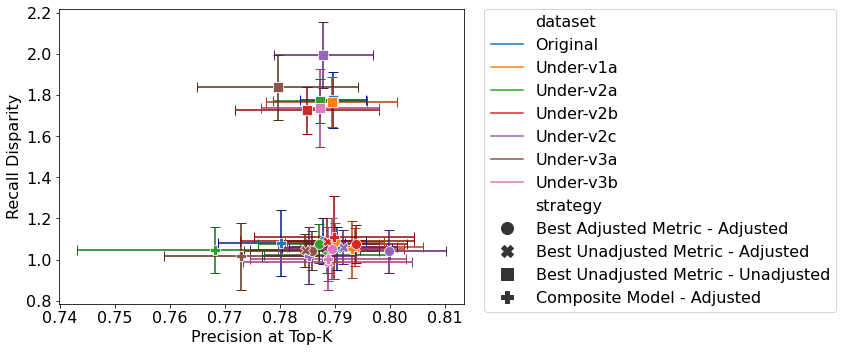

In [28]:
plot(usamp_df)

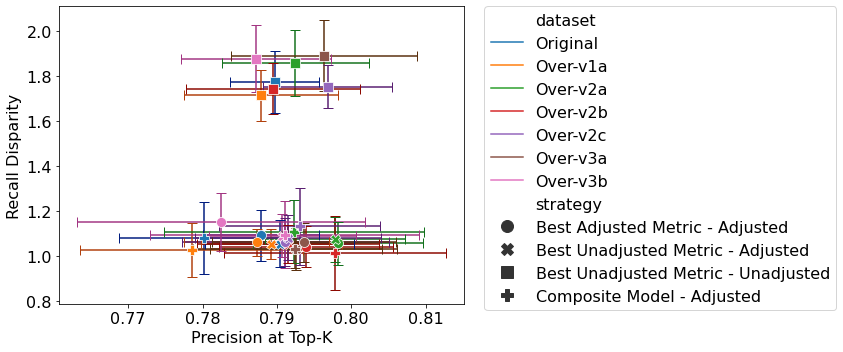

In [29]:
plot(osamp_df)

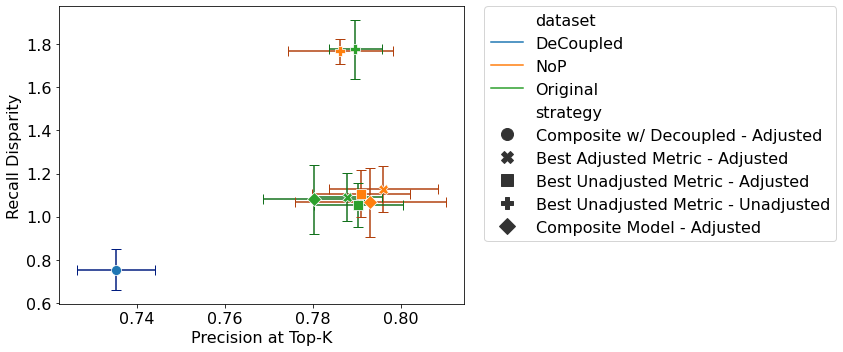

In [41]:
plot(original_df)